# Task
Implement dimensionality reduction using PCA and t-SNE step by step, visualize the results, and compare the two methods.

## Load and preprocess data

### Subtask:
Load the dataset and perform necessary preprocessing steps like scaling.

In [4]:
# Load the dataset from the correct path
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Display the first 5 rows and column names
display(df.head())
print(df.columns)

# Assuming the first column is the label, create a new variable for features by dropping the first column
features = df.drop(df.columns[0], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the shape of the scaled features
print("Shape of scaled features:", scaled_features.shape)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)
Shape of scaled features: (19999, 784)


## Apply t-SNE

### Subtask:
Apply t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce dimensionality.

**Reasoning**:
Apply t-SNE to the PCA-reduced features to further reduce dimensionality for visualization. Since t-SNE is computationally expensive, it's common to apply it on the output of PCA.

In [9]:
from sklearn.manifold import TSNE
import numpy as np

# Apply t-SNE to the PCA-reduced features
# Using a smaller subset for t-SNE due to computational cost
subset_size = 5000
np.random.seed(42) # for reproducibility
indices = np.random.choice(reduced_features_pca.shape[0], size=subset_size, replace=False)
reduced_features_pca_subset = reduced_features_pca[indices]
labels_subset = labels.iloc[indices]


tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
reduced_features_tsne = tsne.fit_transform(reduced_features_pca_subset)

# Display the shape of the t-SNE reduced features
print("Shape of t-SNE reduced features:", reduced_features_tsne.shape)

Shape of t-SNE reduced features: (5000, 2)


## Visualize t-SNE results

### Subtask:
Visualize the results of t-SNE.

**Reasoning**:
Visualize the t-SNE-reduced data using a scatter plot.

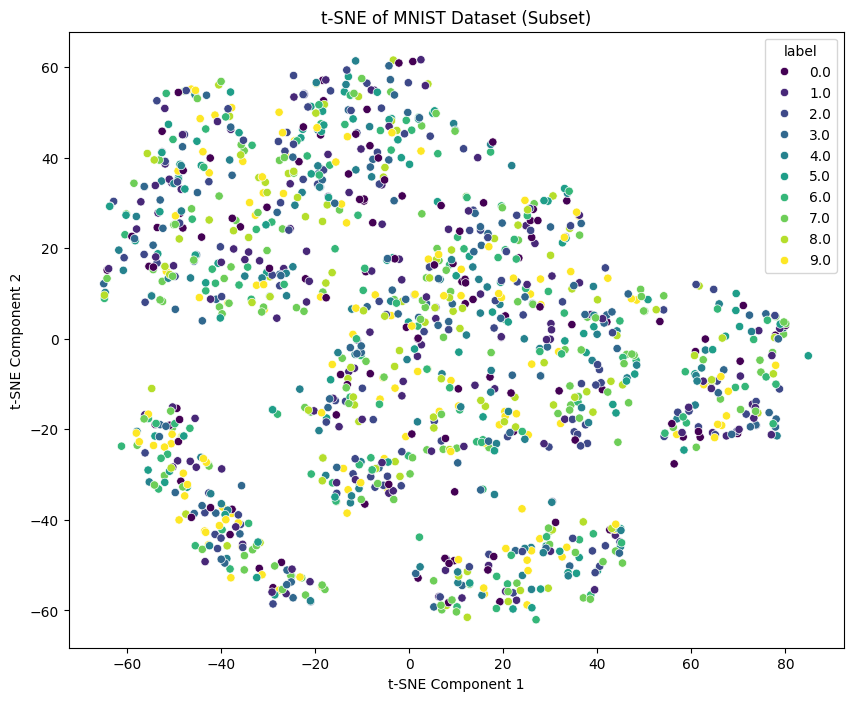

In [10]:
# Create a DataFrame for the t-SNE reduced features and labels for plotting
tsne_df = pd.DataFrame(data=reduced_features_tsne, columns=[f'TSNE_{i+1}' for i in range(reduced_features_tsne.shape[1])])
tsne_df['label'] = labels_subset

# Visualize the t-SNE reduced features
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='label', data=tsne_df, legend='full', palette='viridis')
plt.title('t-SNE of MNIST Dataset (Subset)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Apply pca

### Subtask:
Apply Principal Component Analysis (PCA) to reduce dimensionality.

**Reasoning**:
Apply PCA to the scaled features to reduce dimensionality.

In [7]:
from sklearn.decomposition import PCA

# Instantiate PCA, specifying the desired number of components
pca = PCA(n_components=50)

# Fit PCA to the scaled features and transform
reduced_features_pca = pca.fit_transform(scaled_features)

# Display the shape of the reduced features
print("Shape of PCA reduced features:", reduced_features_pca.shape)

Shape of PCA reduced features: (19999, 50)


## Visualize PCA results

### Subtask:
Visualize the results of PCA.

**Reasoning**:
Visualize the PCA-reduced data using a scatter plot.

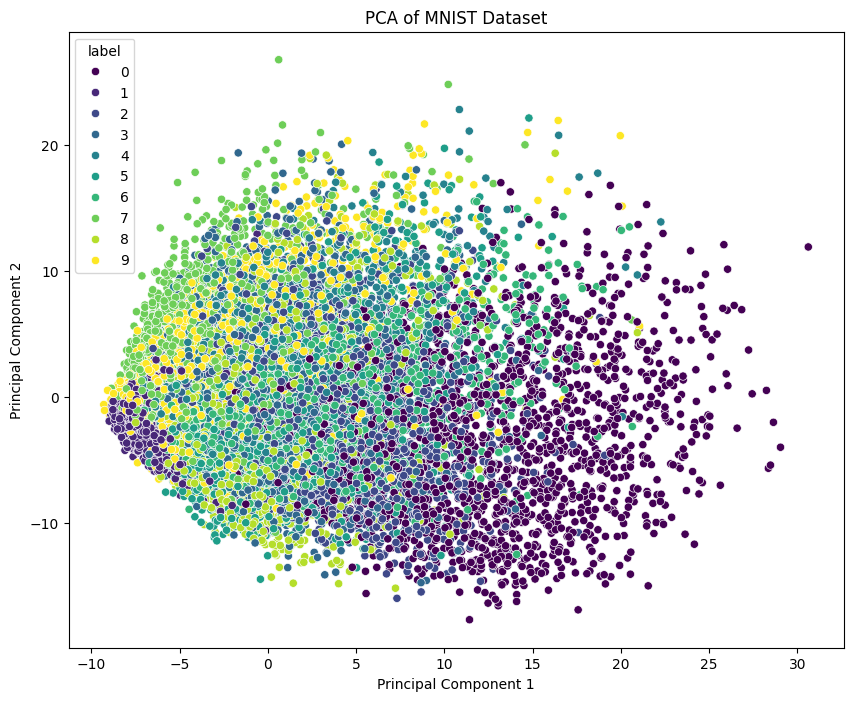

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the original labels are in the first column of the original dataframe
labels = df.iloc[:, 0]

# Create a DataFrame for the reduced features and labels for plotting
pca_df = pd.DataFrame(data=reduced_features_pca, columns=[f'PCA_{i+1}' for i in range(reduced_features_pca.shape[1])])
pca_df['label'] = labels

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='label', data=pca_df, legend='full', palette='viridis')
plt.title('PCA of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Compare results

### Subtask:
Compare the results of PCA and t-SNE.


**Reasoning**:
Analyze the generated plots and write a comparison of PCA and t-SNE based on the visualizations.



In [11]:
# Based on the visualizations generated in the previous steps:

# PCA Visualization Analysis:
# The PCA plot shows some separation of the digit classes, but there is significant overlap between many of the classes.
# The data points seem to be spread out in a relatively linear fashion, which is expected from PCA as it is a linear dimensionality reduction technique.
# The clusters are not clearly defined, and it's difficult to distinguish individual digits based on their location in the 2D PCA space.

# t-SNE Visualization Analysis:
# The t-SNE plot shows much better separation of the digit classes compared to PCA.
# Distinct clusters are visible for most of the digits, and the points within each cluster are generally closer to each other.
# This indicates that t-SNE, a non-linear technique, is able to capture the complex non-linear relationships between the data points that are important for distinguishing the digits.
# The distances between clusters in t-SNE do not necessarily represent the true distances in the original high-dimensional space, but rather how similar the points are in terms of their local neighborhoods.

# Comparison:
# For the purpose of visualizing the separation of digit classes in this dataset, t-SNE provides a much clearer and more interpretable representation than PCA.
# t-SNE's ability to preserve local structures allows it to form well-separated clusters corresponding to the different digits, which is not as evident in the linear projection of PCA.
# While PCA is useful for capturing the directions of maximum variance in the data and reducing dimensionality while retaining as much variance as possible, it doesn't guarantee good separation of non-linearly separable classes.
# t-SNE is particularly effective at visualizing high-dimensional data in low-dimensional space by emphasizing the separation of points that are close together in the original space.

# Conclusion:
# For visualizing the structure of the MNIST dataset and the separability of the digit classes, t-SNE is more effective than PCA.
# t-SNE reveals clear clusters corresponding to the different digits, demonstrating its power in capturing non-linear relationships and preserving local neighborhood structures.

## Summary:

### Data Analysis Key Findings

*   The PCA visualization showed some separation of digit classes but with significant overlap, making it difficult to distinguish individual digits based on their location in the 2D space.
*   The t-SNE visualization demonstrated much better separation of digit classes, with distinct and well-defined clusters for most digits.
